In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [45]:
def rem_out(df):
    m = df['Profit'].mean()
    std = df['Profit'].std()
    df = df[(df['Profit'] <= m + 3 * std) & (df['Profit'] >= m - 3 * std)]
    m = df['Sales'].mean()
    std = df['Sales'].std()
    df = df[(df['Sales'] <= m + 3 * std) & (df['Sales'] >= m - 3 * std)]
    return df

In [46]:
df = pd.read_csv('data.csv', encoding='windows-1252')
cons = df[df['Segment'] == 'Consumer']
cons = rem_out(cons)
home = df[df['Segment'] == 'Home Office']
home = rem_out(home)
corp = df[df['Segment'] == 'Corporate']
corp = rem_out(corp)
print(cons.shape)
print(home.shape)
print(corp.shape)

(1624, 19)
(637, 19)
(946, 19)


Text(0, 0.5, 'Profit')

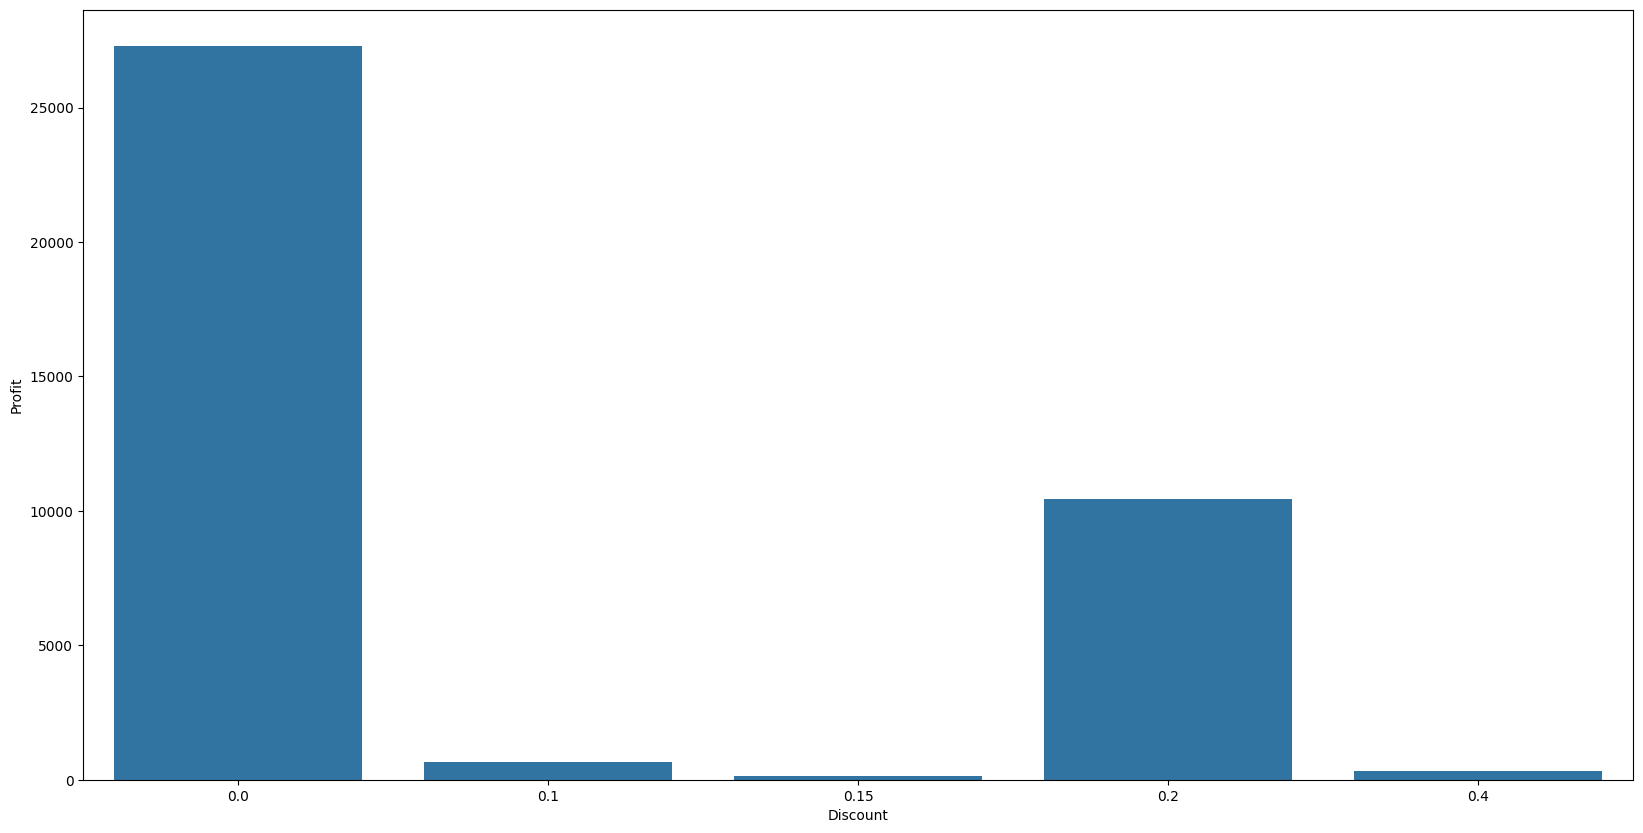

In [47]:
profit_discount = cons[cons['Profit'] >= 0].groupby('Discount')['Profit'].sum()
plt.figure(figsize=(20,10))
sns.barplot(x=profit_discount.index,y=profit_discount.values)
plt.xlabel('Discount')
plt.ylabel('Profit')

In [50]:
print(cons.shape)
cons = cons[cons['Discount'] <= 0.4]
cons = cons[(cons['Sub-Category'] != 'Machines') & (cons['Sub-Category'] != 'Copiers')]
print(cons.shape)

(1471, 19)
(1460, 19)


In [55]:
ctb = pd.crosstab(cons['Sub-Category'], cons['Customer ID'])
ctb = ctb.applymap(lambda x: min(1, x))
ctb = ctb.T

C:\Users\janst\AppData\Local\Temp\ipykernel_13832\3831959900.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ctb = ctb.applymap(lambda x: min(1, x))


In [60]:
frequent_itemsets = apriori(ctb, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules = rules[rules['confidence'] >= 0.1]
rules

c:\Users\janst\source\BHL-Ctrl-Alt-Defeat\env\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accessories),(Appliances),0.308989,0.174157,0.044944,0.145455,0.835191,-0.008869,0.966412,-0.222134
1,(Appliances),(Accessories),0.174157,0.308989,0.044944,0.258065,0.835191,-0.008869,0.931363,-0.192862
2,(Art),(Accessories),0.345506,0.308989,0.117978,0.341463,1.105100,0.011220,1.049313,0.145310
3,(Accessories),(Art),0.308989,0.345506,0.117978,0.381818,1.105100,0.011220,1.058741,0.137631
4,(Accessories),(Binders),0.308989,0.294944,0.101124,0.327273,1.109610,0.009989,1.048056,0.142954
...,...,...,...,...,...,...,...,...,...,...
1466,"(Paper, Accessories)","(Phones, Storage, Binders)",0.162921,0.061798,0.022472,0.137931,2.231975,0.012404,1.088315,0.659396
1467,"(Paper, Binders)","(Phones, Storage, Accessories)",0.126404,0.050562,0.022472,0.177778,3.516049,0.016081,1.154722,0.819132
1468,"(Storage, Accessories)","(Phones, Paper, Binders)",0.117978,0.056180,0.022472,0.190476,3.390476,0.015844,1.165896,0.799363
1469,"(Storage, Binders)","(Phones, Accessories, Paper)",0.109551,0.075843,0.022472,0.205128,2.704653,0.014163,1.162650,0.707808


In [65]:
cons['Class'] = cons['Sub-Category'] + '-' + cons['Discount'].astype(str)
print(cons['Class'].unique())

['Furnishings-0.2' 'Furnishings-0.0' 'Storage-0.2' 'Chairs-0.3' 'Art-0.2'
 'Tables-0.3' 'Paper-0.0' 'Art-0.0' 'Storage-0.0' 'Supplies-0.0'
 'Fasteners-0.0' 'Envelopes-0.2' 'Phones-0.2' 'Paper-0.2' 'Appliances-0.2'
 'Accessories-0.2' 'Chairs-0.0' 'Labels-0.2' 'Phones-0.4' 'Appliances-0.0'
 'Envelopes-0.0' 'Phones-0.0' 'Binders-0.2' 'Labels-0.0' 'Chairs-0.2'
 'Supplies-0.2' 'Bookcases-0.0' 'Bookcases-0.2' 'Accessories-0.0'
 'Fasteners-0.2' 'Binders-0.0' 'Tables-0.2' 'Chairs-0.1' 'Tables-0.0'
 'Bookcases-0.32' 'Bookcases-0.15' 'Tables-0.4' 'Bookcases-0.3']


In [66]:
ctb = pd.crosstab(cons['Class'], cons['Customer ID'])
ctb = ctb.applymap(lambda x: min(1, x))
ctb = ctb.T
frequent_itemsets = apriori(ctb, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules = rules[rules['confidence'] >= 0.1]
rules

C:\Users\janst\AppData\Local\Temp\ipykernel_13832\753297348.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ctb = ctb.applymap(lambda x: min(1, x))
c:\Users\janst\source\BHL-Ctrl-Alt-Defeat\env\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Appliances-0.0),(Accessories-0.0),0.140449,0.191011,0.028090,0.200000,1.047059,0.001262,1.011236,0.052288
1,(Accessories-0.0),(Appliances-0.0),0.191011,0.140449,0.028090,0.147059,1.047059,0.001262,1.007749,0.055556
2,(Art-0.0),(Accessories-0.0),0.210674,0.191011,0.042135,0.200000,1.047059,0.001894,1.011236,0.056940
3,(Accessories-0.0),(Art-0.0),0.191011,0.210674,0.042135,0.220588,1.047059,0.001894,1.012720,0.055556
4,(Art-0.2),(Accessories-0.0),0.151685,0.191011,0.025281,0.166667,0.872549,-0.003693,0.970787,-0.146893
...,...,...,...,...,...,...,...,...,...,...
294,"(Paper-0.0, Phones-0.2)",(Storage-0.0),0.075843,0.182584,0.022472,0.296296,1.622792,0.008624,1.161591,0.415274
295,"(Paper-0.0, Storage-0.0)",(Phones-0.2),0.070225,0.191011,0.022472,0.320000,1.675294,0.009058,1.189689,0.433535
296,"(Phones-0.2, Storage-0.0)",(Paper-0.0),0.039326,0.292135,0.022472,0.571429,1.956044,0.010983,1.651685,0.508772
298,(Phones-0.2),"(Paper-0.0, Storage-0.0)",0.191011,0.070225,0.022472,0.117647,1.675294,0.009058,1.053745,0.498264
